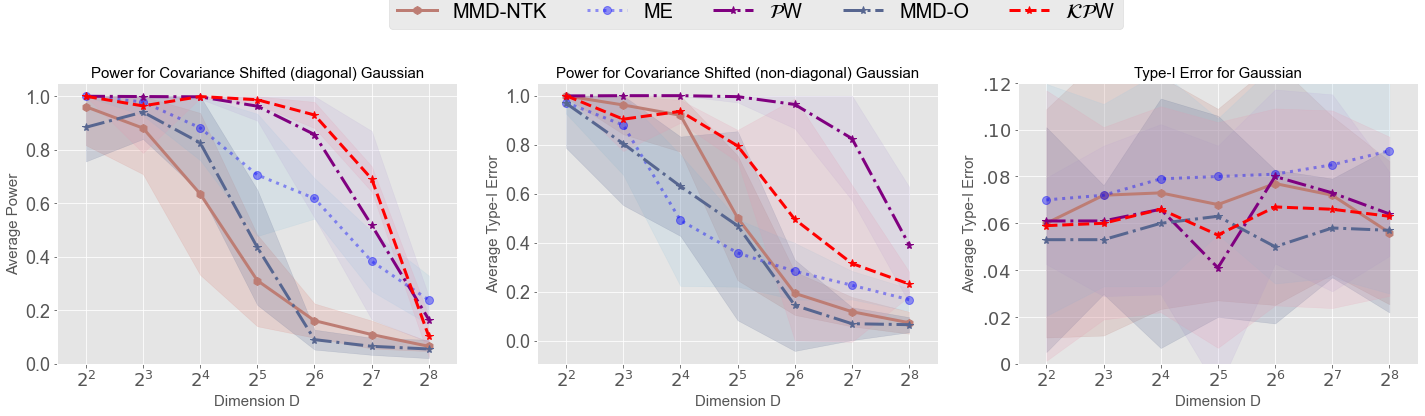

In [25]:
from logging import Handler
import numpy as np
import matplotlib.pyplot as plt

def get_summary_hist(decision_hist,LD_hist):
    summary_hist = np.zeros([LD_hist, 2])
    power_total_hist = np.mean(decision_hist,1)

    summary_hist[:,0] = np.mean(power_total_hist, 1)
    summary_hist[:,1] = 1.96 * np.sqrt(np.var(power_total_hist, 1))

    #print(power_total_hist)
    return summary_hist


# plotting power
D_hist = [4,8,16,32,64,128,256]
LD_hist = len(D_hist)
decision_hist_ME = np.load('ME_decision_hist_Gauss_Var_shifted.npy')
decision_hist_NTK = np.load('NTK_decision_hist_Gauss_Var_shifted.npy')
decision_hist_PW = np.load('PW_decision_hist_Gauss_Var_shifted.npy')
decision_hist_MMDO = np.load('MMDO_decision_hist_Gauss_Var_shifted.npy')
decision_hist_KPW = np.load('KPW_decision_hist_Gauss_Var_shifted.npy')

decision_hist_ME_nondiag = np.load('ME_decision_hist_G_nondiag_Var_shifted.npy')
decision_hist_NTK_nondiag = np.load('NTK_decision_hist_G_nondiag_Var_shifted.npy')
decision_hist_PW_nondiag = np.load('PW_decision_hist_G_nondiag_Var_shifted.npy')
decision_hist_MMDO_nondiag = np.load('MMDO_decision_hist_G_nondiag_Var_shifted.npy')
decision_hist_KPW_nondiag = np.load('KPW_decision_hist_G_nondiag_Var_shifted.npy')

summary_ME_hist = get_summary_hist(decision_hist_ME,LD_hist)
summary_NTK_hist = get_summary_hist(decision_hist_NTK,LD_hist)
summary_PW_hist = get_summary_hist(decision_hist_PW,LD_hist)
summary_MMDO_hist = get_summary_hist(decision_hist_MMDO,LD_hist)
summary_KPW_hist = get_summary_hist(decision_hist_KPW,LD_hist)

summary_ME_nondiag_hist = get_summary_hist(decision_hist_ME_nondiag,LD_hist)
summary_NTK_nondiag_hist = get_summary_hist(decision_hist_NTK_nondiag,LD_hist)
summary_PW_nondiag_hist = get_summary_hist(decision_hist_PW_nondiag,LD_hist)
summary_MMDO_nondiag_hist = get_summary_hist(decision_hist_MMDO_nondiag,LD_hist)
summary_KPW_nondiag_hist = get_summary_hist(decision_hist_KPW_nondiag,LD_hist)



x = np.array([1,2,3,4,5,6,7])
plt.rcParams["font.family"] = "arial"
plt.style.use("ggplot")
fig, axes = plt.subplots(ncols=3, figsize=(21,6))

############## Diagnoal Gaussian Shift ############## 
axes[0].plot(x, summary_NTK_hist[:,0], label=r'MMD-NTK', 
            linestyle = '-', marker = 'h', color='#BD7D74',ms=8,linewidth=3)
axes[0].plot(x, summary_ME_hist[:,0], label=r'ME', 
            linestyle = ':', marker = 'o', color='b',ms=8,linewidth=3,alpha=0.4)
axes[0].plot(x, summary_PW_hist[:,0], label=r'$\mathcal{P}$W', 
            linestyle = '-.', marker = '*', color='purple',ms=8,linewidth=3)
axes[0].plot(x, summary_MMDO_hist[:,0], label=r'MMD-O', 
            linestyle = '-.', marker = '*', color='#576690',ms=8,linewidth=3)
axes[0].plot(x, summary_KPW_hist[:,0], label=r'$\mathcal{KP}$W', 
            linestyle = '--', marker = '*', color='r',ms=8,linewidth=3)
axes[0].fill_between(x, 
                np.minimum(summary_NTK_hist[:,0]+summary_NTK_hist[:,1],1), 
                summary_NTK_hist[:,0]-summary_NTK_hist[:,1],
                color='#DB7D74',alpha=0.2)
axes[0].fill_between(x, 
                np.minimum(summary_ME_hist[:,0]+summary_ME_hist[:,1],1), 
                summary_ME_hist[:,0]-summary_ME_hist[:,1],
                color='#9AC8E2',alpha=0.2)
axes[0].fill_between(x, 
                np.minimum(summary_PW_hist[:,0]+summary_PW_hist[:,1],1), 
                summary_PW_hist[:,0]-summary_PW_hist[:,1],
                color='#B8A6D9',alpha=0.2)
axes[0].fill_between(x, 
                np.minimum(summary_MMDO_hist[:,0]+summary_MMDO_hist[:,1],1), 
                summary_MMDO_hist[:,0]-summary_MMDO_hist[:,1],
                color='#576690',alpha=0.2)
axes[0].fill_between(x, 
                np.minimum(summary_KPW_hist[:,0]+summary_KPW_hist[:,1],1), 
                summary_KPW_hist[:,0]-summary_KPW_hist[:,1],
                color='#E799B0',alpha=0.2)
axes[0].set_xlim([0.5,7+0.5])
axes[0].set_ylim([0,1.05])
axes[0].set_xticks([1,2,3,4,5,6,7])
axes[0].set_xticklabels([r'$2^2$',r'$2^3$',r'$2^4$',r'$2^5$',r'$2^6$',r'$2^7$',r'$2^8$'])
axes[0].grid(True)
axes[0].tick_params(labelsize=18)
axes[0].set_xlabel('Dimension D', fontsize=15)
axes[0].set_ylabel(r'Average Power', fontsize=15)
axes[0].set_title(r'Power for Covariance Shifted (diagonal) Gaussian',fontsize=15)



axes[1].plot(x, summary_NTK_nondiag_hist[:,0], #label=r'NTK', 
            linestyle = '-', marker = 'h', color='#BD7D74',ms=8,linewidth=3)
axes[1].plot(x, summary_ME_nondiag_hist[:,0], #label=r'ME', 
            linestyle = ':', marker = 'o', color='b',ms=8,linewidth=3,alpha=0.4)
axes[1].plot(x, summary_PW_nondiag_hist[:,0], #label=r'$\mathcal{P}$W', 
            linestyle = '-.', marker = '*', color='purple',ms=8,linewidth=3)
axes[1].plot(x, summary_MMDO_nondiag_hist[:,0], #label=r'MMD_o', 
            linestyle = '-.', marker = '*', color='#576690',ms=8,linewidth=3)
axes[1].plot(x, summary_KPW_nondiag_hist[:,0], #label=r'$\mathcal{KP}$W', 
            linestyle = '--', marker = '*', color='r',ms=8,linewidth=3)
axes[1].fill_between(x, 
                np.minimum(summary_NTK_nondiag_hist[:,0]+summary_NTK_nondiag_hist[:,1],1), 
                summary_NTK_nondiag_hist[:,0]-summary_NTK_nondiag_hist[:,1],
                color='#BD7D74',alpha=0.2)
axes[1].fill_between(x, 
                np.minimum(summary_ME_nondiag_hist[:,0]+summary_ME_nondiag_hist[:,1],1), 
                summary_ME_nondiag_hist[:,0]-summary_ME_nondiag_hist[:,1],
                color='#9AC8E2',alpha=0.2)
axes[1].fill_between(x,
                np.minimum(summary_PW_nondiag_hist[:,0]+summary_PW_nondiag_hist[:,1],1), 
                summary_PW_nondiag_hist[:,0]-summary_PW_nondiag_hist[:,1],
                color='#B8A6D9',alpha=0.2)
axes[1].fill_between(x, 
                np.minimum(summary_MMDO_nondiag_hist[:,0]+summary_MMDO_nondiag_hist[:,1],1), 
                summary_MMDO_nondiag_hist[:,0]-summary_MMDO_nondiag_hist[:,1],
                color='#576690',alpha=0.2)
axes[1].fill_between(x, 
                np.minimum(summary_KPW_nondiag_hist[:,0]+summary_KPW_nondiag_hist[:,1],1), 
                summary_KPW_nondiag_hist[:,0]-summary_KPW_nondiag_hist[:,1],
                color='#E799B0',alpha=0.2)

axes[1].set_xlim([0.5,7+0.5])
axes[1].set_xticks([1,2,3,4,5,6,7])
axes[1].set_xticklabels([r'$2^2$',r'$2^3$',r'$2^4$',r'$2^5$',r'$2^6$',r'$2^7$',r'$2^8$'],fontsize=21)
axes[1].grid(True)
axes[1].tick_params(labelsize=18)
axes[1].set_xlabel('Dimension D', fontsize=15)
axes[1].set_ylabel(r'Average Type-I Error', fontsize=15)
axes[1].set_title(r'Power for Covariance Shifted (non-diagonal) Gaussian', fontsize=15)




decision_hist_NTK = np.load('NTK_decision_hist_Gauss_Var_shifted_level.npy')
decision_hist_ME = np.load('ME_decision_hist_Gauss_Var_shifted_level.npy')
decision_hist_PW = np.load('PW_decision_hist_Gauss_Var_shifted_level.npy')
decision_hist_MMDO = np.load('MMDO_decision_hist_Gauss_Var_shifted_level.npy')
decision_hist_KPW = np.load('KPW_decision_hist_Gauss_Var_shifted_level.npy')

summary_NTK_hist = get_summary_hist(decision_hist_NTK,LD_hist)
summary_ME_hist = get_summary_hist(decision_hist_ME,LD_hist)
summary_PW_hist = get_summary_hist(decision_hist_PW,LD_hist)
summary_MMDO_hist = get_summary_hist(decision_hist_MMDO,LD_hist)
summary_KPW_hist = get_summary_hist(decision_hist_KPW,LD_hist)

axes[2].plot(x, summary_NTK_hist[:,0], #label=r'NTK', 
            linestyle = '-', marker = 'h', color='#BD7D74',ms=8,linewidth=3)
axes[2].plot(x, summary_ME_hist[:,0], #label=r'ME', 
            linestyle = ':', marker = 'o', color='b',ms=8,linewidth=3,alpha=0.4)
axes[2].plot(x, summary_PW_hist[:,0], #label=r'$\mathcal{P}$W', 
            linestyle = '-.', marker = '*', color='purple',ms=8,linewidth=3)
axes[2].plot(x, summary_MMDO_hist[:,0], #label=r'MMD_o', 
            linestyle = '-.', marker = '*', color='#576690',ms=8,linewidth=3)
axes[2].plot(x, summary_KPW_hist[:,0], #label=r'$\mathcal{KP}$W', 
            linestyle = '--', marker = '*', color='r',ms=8,linewidth=3)
axes[2].fill_between(x, 
                np.minimum(summary_NTK_hist[:,0]+summary_NTK_hist[:,1],1), 
                summary_NTK_hist[:,0]-summary_NTK_hist[:,1],
                color='#BD7D74',alpha=0.2)
axes[2].fill_between(x, 
                np.minimum(summary_ME_hist[:,0]+summary_ME_hist[:,1],1), 
                summary_ME_hist[:,0]-summary_ME_hist[:,1],
                color='#9AC8E2',alpha=0.2)
axes[2].fill_between(x,
                np.minimum(summary_PW_hist[:,0]+summary_PW_hist[:,1],1), 
                summary_PW_hist[:,0]-summary_PW_hist[:,1],
                color='#B8A6D9',alpha=0.2)
axes[2].fill_between(x, 
                np.minimum(summary_MMDO_hist[:,0]+summary_MMDO_hist[:,1],1), 
                summary_MMDO_hist[:,0]-summary_MMDO_hist[:,1],
                color='#576690',alpha=0.2)
axes[2].fill_between(x, 
                np.minimum(summary_KPW_hist[:,0]+summary_KPW_hist[:,1],1), 
                summary_KPW_hist[:,0]-summary_KPW_hist[:,1],
                color='#E799B0',alpha=0.2)

axes[2].set_xlim([0.5,7+0.5])
axes[2].set_ylim([0,.12])
axes[2].set_xticks([1,2,3,4,5,6,7])
axes[2].set_xticklabels([r'$2^2$',r'$2^3$',r'$2^4$',r'$2^5$',r'$2^6$',r'$2^7$',r'$2^8$'],fontsize=21)
axes[2].set_yticks([0,0.02,0.04,0.06,0.08,0.10,0.12])
axes[2].set_yticklabels([r'$0$',r'$.02$',r'$.04$',r'$.06$',r'$.08$',r'$.10$',r'$.12$'])
axes[2].grid(True)
axes[2].tick_params(labelsize=18)
axes[2].set_xlabel('Dimension D', fontsize=15)
axes[2].set_ylabel(r'Average Type-I Error', fontsize=15)
axes[2].set_title(r'Type-I Error for Gaussian', fontsize=15)

plt.subplots_adjust(top=0.8, bottom=0.15,left=0.07, right=0.97)
fig.legend(loc="upper center",bbox_to_anchor=(0.5,1),fontsize=20,ncol=5)

#plt.show()

plt.savefig('Exp_Gaussian_Dimension_summary.pdf')